<a href="https://colab.research.google.com/github/NAVEED261/MY-AI-ASSISTANT/blob/main/Travel_Judge_Assistant.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [16]:
%%capture --no-stderr
!pip install --upgrade langchain langchain_google_genai langgraph tavily-python langchain_community langchain_core



In [17]:
import os
from google.colab import userdata
Gemnai_api_key = userdata.get('GOOGLE_API_KEY')
tavily_api_key = userdata.get("Tavily_Api_Key")
os.environ["Tavily_Api_Key"] = "Tavily_Api_Key"

from langchain_google_genai import ChatGoogleGenerativeAI
llm: ChatGoogleGenerativeAI = ChatGoogleGenerativeAI (
    model = "gemini-pro",  # Changed the model name to a valid model identifier
    api_key = Gemnai_api_key
)
llm.invoke("i am hafiz naveed uddin from karachi")

AIMessage(content='Hello Hafiz Naveed Uddin from Karachi. Welcome to the world of AI and language models. I am Gemini, a multimodal AI model, developed by Google. I am designed to assist and inform users to the best of my abilities. While I may not possess personal experiences or emotions, I am dedicated to providing comprehensive and helpful responses based on the information available to me. If you have any questions or need assistance with a topic, feel free to ask, and I will do my best to assist you.', additional_kwargs={}, response_metadata={'prompt_feedback': {'block_reason': 0, 'safety_ratings': []}, 'finish_reason': 'STOP', 'safety_ratings': [{'category': 'HARM_CATEGORY_SEXUALLY_EXPLICIT', 'probability': 'NEGLIGIBLE', 'blocked': False}, {'category': 'HARM_CATEGORY_HATE_SPEECH', 'probability': 'NEGLIGIBLE', 'blocked': False}, {'category': 'HARM_CATEGORY_HARASSMENT', 'probability': 'NEGLIGIBLE', 'blocked': False}, {'category': 'HARM_CATEGORY_DANGEROUS_CONTENT', 'probability': 'N

In [18]:
LANGCHAIN_API_KEY = userdata.get('memory-enabled-agent')  # LangSmith API key

# Configure environment variables for LangChain and LangSmith
os.environ["LANGCHAIN_TRACING_V2"] = "true"  # Enable LangSmith tracing
os.environ["LANGCHAIN_PROJECT"] = "memory-enabled-agent"  # Set LangSmith project name
os.environ["LANGCHAIN_API_KEY"] = LANGCHAIN_API_KEY  # Set LangSmith API key


In [19]:
import os
from google.colab import userdata

# ... (other imports)

# Get the Tavily API key
tavily_api_key = userdata.get("Tavily_Api_Key")

# Set the environment variable with the actual API key value
os.environ["TAVILY_API_KEY"] = tavily_api_key  # Use correct environment variable name

# ... (other code)

from langchain_community.tools.tavily_search import TavilySearchResults

# Initialize the tool with the API key
# Using the environment variable, no need to pass it directly
tool = TavilySearchResults(max_results=2)
# Alternatively, pass directly: tool = TavilySearchResults(tavily_api_key=tavily_api_key, max_results=2)

tools = [tool]
tool.invoke("What's a 'node' in LangGraph?")

[{'url': 'https://medium.com/@cplog/introduction-to-langgraph-a-beginners-guide-14f9be027141',
  'content': 'Nodes: Nodes are the building blocks of your LangGraph. Each node represents a function or a computation step. You define nodes to perform specific tasks, such as processing input, making'},
 {'url': 'https://www.datacamp.com/tutorial/langgraph-tutorial',
  'content': "In LangGraph, each node represents an LLM agent, and the edges are the communication channels between these agents. This structure allows for clear and manageable workflows, where each agent performs specific tasks and passes information to other agents as needed. State management. One of LangGraph's standout features is its automatic state"}]

In [21]:
def calculate_compensation(delay_hours: float, ticket_cost: float, inconvenience_level: str) -> str:
    """
    Calculates the compensation amount for travel delays.

    Args:
        delay_hours (float): The number of hours the travel was delayed.
        ticket_cost (float): The cost of the ticket in USD.
        inconvenience_level (str): The level of inconvenience caused ('low', 'medium', 'high').

    Returns:
        str: A string with the calculated compensation amount.
    """
    base_compensation = 0.0

    # Calculate base compensation based on delay hours
    if 0 < delay_hours <= 2:
        base_compensation = ticket_cost * 0.25
    elif 2 < delay_hours <= 5:
        base_compensation = ticket_cost * 0.5
    elif delay_hours > 5:
        base_compensation = ticket_cost * 0.75

    # Adjust compensation based on inconvenience level
    if inconvenience_level.lower() == "high":
        base_compensation += 100  # Additional for high inconvenience
    elif inconvenience_level.lower() == "medium":
        base_compensation += 50  # Additional for medium inconvenience

    # Ensure compensation is fair and within ticket cost
    if base_compensation > ticket_cost:
        base_compensation = ticket_cost

    return f"The calculated compensation is ${base_compensation:.2f}."


def check_refund_eligibility(ticket_cost: float, cancellation_reason: str) -> str:
    """
    Determines if a customer is eligible for a refund based on the cancellation reason.

    Args:
        ticket_cost (float): The cost of the ticket in USD.
        cancellation_reason (str): The reason for the cancellation (e.g., 'medical emergency', 'flight cancellation').

    Returns:
        str: A string indicating whether the customer is eligible for a refund.
    """
    eligible_reasons = ["medical emergency", "flight cancellation", "overbooking"]
    if cancellation_reason.lower() in eligible_reasons:
        return f"The customer is eligible for a full refund of ${ticket_cost:.2f}."
    else:
        return "The customer is not eligible for a refund based on the given reason."


def legal_case_evaluation(case_details: str) -> str:
    """
    Evaluates the legal strength of a travel-related case based on provided details.

    Args:
        case_details (str): A description of the case including relevant facts and issues.

    Returns:
        str: A string with a legal recommendation or analysis of the case's strength.
    """
    if "delay" in case_details.lower() and "no compensation" in case_details.lower():
        return "The case has a strong basis for legal escalation due to lack of compensation for delays."
    elif "lost baggage" in case_details.lower():
        return "The case has moderate legal strength for compensation claims due to lost baggage."
    elif "overbooking" in case_details.lower():
        return "The case is strong and should be pursued for compensation due to overbooking."
    else:
        return "The case details are unclear. Recommend gathering more evidence."


def calculate_airline_penalty(delay_hours: float, passenger_count: int) -> str:
    """
    Calculates the penalty that should be imposed on an airline for delays.

    Args:
        delay_hours (float): The total hours of delay caused by the airline.
        passenger_count (int): The total number of passengers affected.

    Returns:
        str: A string with the calculated penalty amount.
    """
    penalty_per_hour = 50  # Base penalty per passenger per hour of delay
    total_penalty = delay_hours * passenger_count * penalty_per_hour

    return f"The airline should be fined a total of ${total_penalty:.2f} for the delay."


# List of tools for LangGraph integration
tools = [
    calculate_compensation,
    check_refund_eligibility,
    legal_case_evaluation,
    calculate_airline_penalty,
]

# Binding tools to the LLM
llm_with_tools = llm.bind_tools(tools)


In [22]:
llm_with_tools

RunnableBinding(bound=ChatGoogleGenerativeAI(model='models/gemini-pro', google_api_key=SecretStr('**********'), client=<google.ai.generativelanguage_v1beta.services.generative_service.client.GenerativeServiceClient object at 0x7c2599735480>, default_metadata=()), kwargs={'tools': [{'function_declarations': [{'name': 'calculate_compensation', 'description': "Calculates the compensation amount for travel delays.\n\nArgs:\n    delay_hours (float): The number of hours the travel was delayed.\n    ticket_cost (float): The cost of the ticket in USD.\n    inconvenience_level (str): The level of inconvenience caused ('low', 'medium', 'high').\n\nReturns:\n    str: A string with the calculated compensation amount.", 'parameters': {'type_': 6, 'description': "Calculates the compensation amount for travel delays.\n\nArgs:\n    delay_hours (float): The number of hours the travel was delayed.\n    ticket_cost (float): The cost of the ticket in USD.\n    inconvenience_level (str): The level of incon

In [23]:
from langgraph.graph import START, END , StateGraph
from langgraph.prebuilt import tools_condition, ToolNode
from IPython.display import Image, display
from langgraph.graph.state import CompiledStateGraph
from langgraph.graph import  MessagesState
from langgraph.checkpoint.memory import MemorySaver
memory: MemorySaver = MemorySaver()
# Define LLM function for the graph
def llm(state: MessagesState) -> MessagesState:
  # ek assistant bnaya jis ki state ma sub record moujod ha uski type msgstate ha jo state k under tmam msg ki state ha
   return {"messages": [llm_with_tools.invoke( state["messages"])]}


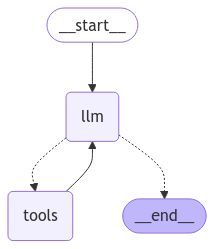

In [24]:
builder: StateGraph = StateGraph(MessagesState)
builder.add_node("llm", llm)
builder.add_node("tools", ToolNode(tools))

builder.add_edge(START, "llm")
builder.add_conditional_edges("llm", tools_condition)
builder.add_edge("tools", "llm")

# Compile the graph
graph: CompiledStateGraph = builder.compile(checkpointer=memory)

# Display graph
display(Image(graph.get_graph(xray=True).draw_mermaid_png()))


In [25]:
from langchain.schema import HumanMessage

# Configuration for the test
config1 = {"configurable": {"thread_id": "1"}}

In [26]:
def stream_graph_updates(user_input: str):
    # Configuration for the stream - provide necessary keys for checkpointer
    config = {"configurable": {"thread_id": "1"}}
    for event in graph.stream({"messages": [("user", user_input)]}, config=config):
        for value in event.values():
            print("Assistant:", value["messages"][-1].content)

while True:
    try:
        user_input = input("User: ")
        if user_input.lower() in ["quit", "exit", "q"]:
            print("Goodbye!")
            break

        stream_graph_updates(user_input)
    except:
        # fallback if input() is not available
        user_input = "What do you know about LangGraph?"
        print("User: " + user_input)
        stream_graph_updates(user_input)
        break

User: assalamualykum
Assistant: Wa alaikum as-salam. How can I help you today?
User: im hafiz naveed uddin from karachi
Assistant: It's a pleasure to meet you, Hafiz Naveed Uddin from Karachi. How can I assist you today?
User: what is langgraph?
Assistant: Langgraph is a company that provides language learning and translation services. It offers a variety of courses and resources to help people learn new languages, as well as translation services for businesses and individuals.
User: do u know my name?
Assistant: Yes, you mentioned your name is Hafiz Naveed Uddin from Karachi. Is there anything else I can help you with today?
User: ok thanks
Assistant: You're welcome. Is there anything else I can help you with today?
User: q
Goodbye!


In [27]:
messages = graph.invoke({"messages": [HumanMessage(content="Calculate compensation for a delay of 3 hours with a ticket cost of $200 and high inconvenience.")]},config1)
for m in messages['messages']:
    m.pretty_print()



================================ Human Message =================================

assalamualykum
================================== Ai Message ==================================

Wa alaikum as-salam. How can I help you today?
================================ Human Message =================================

im hafiz naveed uddin from karachi
================================== Ai Message ==================================

It's a pleasure to meet you, Hafiz Naveed Uddin from Karachi. How can I assist you today?
================================ Human Message =================================

what is langgraph?
================================== Ai Message ==================================

Langgraph is a company that provides language learning and translation services. It offers a variety of courses and resources to help people learn new languages, as well as translation services for businesses and individuals.
================================ Human Message =============================